## Exploratory Data Analysis for the MTA Data

In [ ]:
import pandas as pd
import datetime
from matplotlib.cbook import boxplot_stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
## data for the first three months on 2021
# Source: http://web.mta.info/developers/turnstile.html
#Import the CSV data into pandas DataFrame
def get_data(Month_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for num in Month_nums:
        file_url = url.format(num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs,axis=0, ignore_index=True)

Month_nums =[210327,210320,210313,210306,210227,210220,210213,210206,210130,210123,210116,210109,210102]
df = get_data(Month_nums)

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215


In [16]:
df.to_csv("Downloads.csv")

In [17]:
MTA_df = pd.read_csv('Downloads.csv') 
MTA_df 

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215
...,...,...,...,...,...,...,...,...,...,...,...,...
2719822,2719822,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541
2719823,2719823,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541
2719824,2719824,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541
2719825,2719825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541


## 1 - Data cleaning and preprocessing

In [22]:
#Check for missing values or not 
df.isnull().sum() 

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

##### There are no missing values

In [24]:
#checking columns names
df.columns 

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [26]:
# Removing the space after the EXITS column
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [29]:
# Take the date and time fields into a single datetime column
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [30]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125,2021-03-20 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125,2021-03-20 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135,2021-03-20 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183,2021-03-20 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215,2021-03-20 16:00:00


In [31]:
df.shape

(2719827, 12)

#### We need to group by each unique turnstile and the datetime to count their ENTRIES. if the ENTRIES count > 1 there is a duplicate and it needs to be removed.

In [33]:
# checking duplicates
(df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1830837,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 07:00:00,2
832704,N100,R252,00-00-00,HIGH ST,2021-03-09 03:00:00,2
832702,N100,R252,00-00-00,HIGH ST,2021-03-08 19:00:00,2
832701,N100,R252,00-00-00,HIGH ST,2021-03-08 15:00:00,2
832700,N100,R252,00-00-00,HIGH ST,2021-03-08 11:00:00,2


In [34]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [36]:
# checking again
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-12-26 03:00:00,1
1813161,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 05:00:00,1
1813163,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 13:00:00,1
1813164,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 17:00:00,1
1813165,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 21:00:00,1


In [38]:
#Calculating the DAILY_ENTRIES
df["tunr_id"] = df["C/A"] + df["UNIT"]+df["SCP"]+ df["STATION"]

df[["rev_id","PREV_DATE", "PREV_ENTRIES"]] = (df.groupby(["tunr_id"])["tunr_id","DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-38-8ced085d527c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["rev_id","PREV_DATE", "PREV_ENTRIES"]] = (df.groupby(["tunr_id"])["tunr_id","DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [39]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,rev_id,PREV_DATE,PREV_ENTRIES
209469,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544,2021-03-26 21:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,NaN,NaN
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508852.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508767.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508610.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508531.0


In [41]:
df.dropna(subset=['rev_id',"PREV_DATE"], axis=0, inplace=True)

In [42]:
def get_daily_counts(row, max_counter):
    if row['tunr_id'] == row ['rev_id']:
      counter = row["ENTRIES"] - row["PREV_ENTRIES"]
      if counter < 0:
          # Maybe counter is reversed?
          counter = -counter
      if counter > max_counter:
          # Maybe counter was reset to 0? 
          counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
      if counter > max_counter:
          # Check it again to make sure we're not still giving a counter that's too big
          return 0
      return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df["DAILY_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [43]:
df= df.drop(['rev_id'], axis = 1)

In [44]:
#Calculating the DAILY_EXITS
df[['prev_id',"PREV_DATE", "PREV_EXITS"]] = (df.groupby(['tunr_id'])['tunr_id',"DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
df

<ipython-input-44-fc5ff73d354b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['prev_id',"PREV_DATE", "PREV_EXITS"]] = (df.groupby(['tunr_id'])['tunr_id',"DATE", "EXITS"]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,prev_id,PREV_EXITS
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,5554.0,0.0,NaN,NaN
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,544,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,12/26/2020,7508852.0,85.0,A002R05102-00-0059 ST,2557704.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,12/26/2020,7508767.0,157.0,A002R05102-00-0059 ST,2557689.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,12/26/2020,7508610.0,79.0,A002R05102-00-0059 ST,2557667.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,12/26/2020,7508531.0,20.0,A002R05102-00-0059 ST,2557636.0


In [45]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,prev_id,PREV_EXITS
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,5554.0,0.0,NaN,NaN
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,544,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,12/26/2020,7508852.0,85.0,A002R05102-00-0059 ST,2557704.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,12/26/2020,7508767.0,157.0,A002R05102-00-0059 ST,2557689.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,12/26/2020,7508610.0,79.0,A002R05102-00-0059 ST,2557667.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,12/26/2020,7508531.0,20.0,A002R05102-00-0059 ST,2557636.0


In [46]:
def get_daily_counts(row, max_counter):
   if row['tunr_id'] == row ['prev_id']:
      counter = row["EXITS"] - row["PREV_EXITS"]
      if counter < 0:
          # Maybe counter is reversed?
          counter = -counter
      if counter > max_counter:
          # Maybe counter was reset to 0? 
          counter = min(row["EXITS"], row["PREV_EXITS"])
      if counter > max_counter:
          # Check it again to make sure we're not still giving a counter that's too big
          return 0
      return counter

In [47]:
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [48]:
df["DAILY_EXITS"] = df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [49]:
df = df.drop(['EXITS', 'PREV_DATE','PREV_EXITS','prev_id'], axis = 1)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,tunr_id,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209463,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,21:00:00,REGULAR,5554,2021-03-25 21:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2020-12-26 19:00:00,A002R05102-00-0059 ST,7508852.0,85.0,15.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2020-12-26 15:00:00,A002R05102-00-0059 ST,7508767.0,157.0,22.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2020-12-26 11:00:00,A002R05102-00-0059 ST,7508610.0,79.0,31.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2020-12-26 07:00:00,A002R05102-00-0059 ST,7508531.0,20.0,55.0


In [50]:
#Calculating the TRAFFIC
#Calculate the traffic by adding the DAILY_ENTRIES + DAILY_EXITS
df['TRAFFIC'] = df['DAILY_ENTRIES']+ df['DAILY_EXITS']

station_daily= df.groupby(["STATION", "DATE"],as_index=False) ["TRAFFIC"].sum()
station_daily

,STATION,DATE,TRAFFIC
0,1 AV,01/01/2021,5758.0
1,1 AV,01/02/2021,9814.0
2,1 AV,01/03/2021,7000.0
3,1 AV,01/04/2021,13495.0
4,1 AV,01/05/2021,13791.0
...,...,...,...
34382,ZEREGA AV,12/27/2020,909.0
34383,ZEREGA AV,12/28/2020,1915.0
34384,ZEREGA AV,12/29/2020,1988.0
34385,ZEREGA AV,12/30/2020,1858.0


In [51]:
station_daily["STATION"].value_counts()

WAKEFIELD/241      91
BEACH 90 ST        91
BROADWAY JCT       91
PATH NEW WTC       91
ATL AV-BARCLAY     91
                   ..
191 ST             90
207 ST             90
116 ST-COLUMBIA    89
SUTTER AV-RUTLD    89
BAY RIDGE-95 ST    88
Name: STATION, Length: 378, dtype: int64

In [52]:
#Removing the outliers from TRAFFIC
outliers = boxplot_stats(station_daily["TRAFFIC"]).pop(0)['fliers']
np.sort(outliers)

array([  17313.,   17313.,   17319., ..., 1652443., 2124092., 6561761.])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


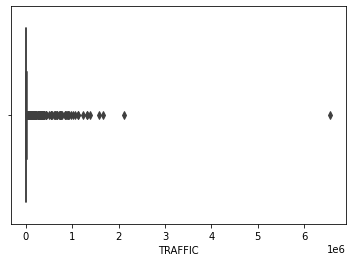

In [56]:
sns.boxplot(station_daily["TRAFFIC"]);
plt.savefig('Downloads.png')

In [57]:
station_daily = station_daily[(station_daily["TRAFFIC"] < 6561761)]
station_daily

,STATION,DATE,TRAFFIC
0,1 AV,01/01/2021,5758.0
1,1 AV,01/02/2021,9814.0
2,1 AV,01/03/2021,7000.0
3,1 AV,01/04/2021,13495.0
4,1 AV,01/05/2021,13791.0
...,...,...,...
34382,ZEREGA AV,12/27/2020,909.0
34383,ZEREGA AV,12/28/2020,1915.0
34384,ZEREGA AV,12/29/2020,1988.0
34385,ZEREGA AV,12/30/2020,1858.0


In [58]:
# What are the ten most active stations?
Top_ten = station_daily.groupby(["STATION"]).agg({'TRAFFIC': sum}).sort_values(by = 'TRAFFIC', ascending = False).head(10)
Top_ten

,TRAFFIC
STATION,
34 ST-PENN STA,5842956.0
34 ST-HERALD SQ,5494166.0
FULTON ST,5011478.0
GRD CNTRL-42 ST,4885895.0
TIMES SQ-42 ST,4630420.0
125 ST,4532653.0
86 ST,4436397.0
PATH NEW WTC,4236617.0
42 ST-PORT AUTH,4011997.0


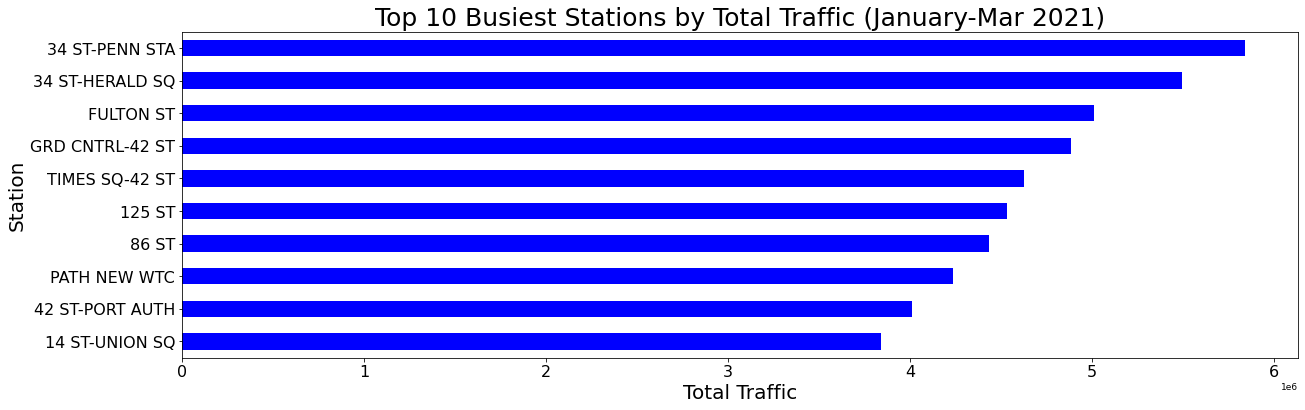

In [62]:
fig, ax = plt.subplots(figsize=(20, 6))
Top_ten.sort_values(by = 'TRAFFIC').plot(kind='barh',color='blue',ax=ax)

#Changing font sizes 
ax.set_title('Top 10 Busiest Stations by Total Traffic (January-Mar 2021)', fontsize=25)
ax.set_xlabel('Total Traffic', fontsize=20)
ax.set_ylabel('Station', fontsize=20)
plt.rcParams['font.size'] = '9'
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)
    


ax.legend().set_visible(False)
plt.savefig('Downloads.png')

In [63]:
#What are the most active days of the week?
# lets create a seprate dataframe with only the date and traffic
week_traffic = station_daily[['DATE','TRAFFIC']]
# Now, lets change the DATE to day names 
week_traffic['Day of Week']= pd.to_datetime(week_traffic['DATE']).dt.day_name()
week_traffic.head(2)

,DATE,TRAFFIC,Day of Week
0,01/01/2021,5758.0,Friday
1,01/02/2021,9814.0,Saturday


In [64]:
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Finally we can group by the day of week and sum the traffic 

week_traffic =week_traffic.groupby(["Day of Week"],as_index=False) ["TRAFFIC"].sum()

# Sort them to make the graph clearer

week_traffic.index = pd.CategoricalIndex(week_traffic["Day of Week"],categories=weekdays,ordered = True )

week_traffic= week_traffic.sort_index().reset_index(drop=True)

week_traffic

,Day of Week,TRAFFIC
0,Monday,42778925.0
1,Tuesday,47012551.0
2,Wednesday,48678920.0
3,Thursday,55791969.0
4,Friday,46359466.0
5,Saturday,35308321.0
6,Sunday,26925496.0


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

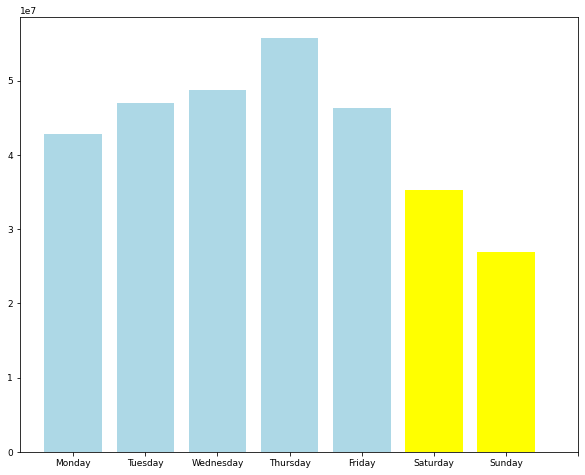

In [69]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
ax.bar(week_traffic['Day of Week'], week_traffic['TRAFFIC'],color = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue','yellow','yellow'])
ax.set_xticks([x for x in range(0,8)])
ax.set_xticklabels(week_traffic['Day of Week']);
ax.set_title('Total traffic by weekday', fontsize=18)
ax.set_xlabel('Weekday', fontsize=15)
ax.set_ylabel('Traffic', fontsize=15);


In [70]:
#What are the most active times for each station?
top_stations=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST','GRD CNTRL-42 ST','TIMES SQ-42 ST','125 ST','86 ST','PATH NEW WTC','42 ST-PORT AUTH','14 ST-UNION'] 

In [71]:
MTA_Traffic_per_hour = df[df['STATION'].isin(top_stations)]
MTA_Traffic_per_hour

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,tunr_id,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
174676,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,13:00:00,REGULAR,245753199,2021-03-26 13:00:00,R305R20601-00-02125 ST,245753484.0,285.0,217.0,502.0
174675,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,09:00:00,REGULAR,245753068,2021-03-26 09:00:00,R305R20601-00-02125 ST,245753199.0,131.0,160.0,291.0
174674,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,05:00:00,REGULAR,245752994,2021-03-26 05:00:00,R305R20601-00-02125 ST,245753068.0,74.0,111.0,185.0
174673,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,01:00:00,REGULAR,245752994,2021-03-26 01:00:00,R305R20601-00-02125 ST,245752994.0,0.0,0.0,0.0
174672,R305,R206,01-00-02,125 ST,23,IRT,03/25/2021,21:00:00,REGULAR,245752973,2021-03-25 21:00:00,R305R20601-00-02125 ST,245752994.0,21.0,36.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512404,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,19:00:00,REGULAR,9854006,2020-12-26 19:00:00,A021R03201-00-00TIMES SQ-42 ST,9854085.0,79.0,104.0,183.0
2512403,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,15:00:00,REGULAR,9853859,2020-12-26 15:00:00,A021R03201-00-00TIMES SQ-42 ST,9854006.0,147.0,243.0,390.0
2512402,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,11:00:00,REGULAR,9853782,2020-12-26 11:00:00,A021R03201-00-00TIMES SQ-42 ST,9853859.0,77.0,256.0,333.0
2512401,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,07:00:00,REGULAR,9853731,2020-12-26 07:00:00,A021R03201-00-00TIMES SQ-42 ST,9853782.0,51.0,151.0,202.0


In [72]:
bins = [0, 5, 13, 17, 25]
time_periods = ['Morning','Afternoon','Evening','Night']
hours = MTA_Traffic_per_hour['DATE_TIME'].dt.hour
MTA_Traffic_per_hour['TIME_PERIOD'] = pd.cut(hours-5+24 *(hours<5), bins=bins, labels=time_periods, right=False)

<ipython-input-72-eabcce79dfdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_Traffic_per_hour['TIME_PERIOD'] = pd.cut(hours-5+24 *(hours<5), bins=bins, labels=time_periods, right=False)


Text(0.5, 1.0, 'Stations Active Times')

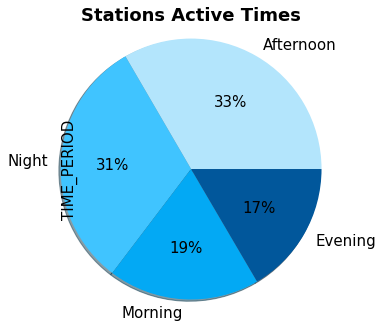

In [74]:
#plot pie chart of day type column
colors =["#b3e5fc","#40c4ff","#03a9f4","#01579b"]
data = MTA_Traffic_per_hour['TIME_PERIOD'].value_counts()

data.plot.pie(autopct='%.0f%%', colors = colors ,radius=1.5, shadow=True )
plt.rcParams['font.size'] = 15
plt.title('Stations Active Times',  pad=40, fontweight='bold')


### Many turnstiles accrues at Night and Afternoon.